In [22]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

import prepare as p
from importlib import reload

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Using your store items data:

### Exercise
Do your work for this exercise in a notebook named `explore.ipynb`. Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

**Note: When resampling data, use a `mean()` aggregation method.**

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.

In [102]:
store_df = p.acquire_and_prep_sales()

In [103]:
store_df

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,Sunday,279.62
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,Sunday,13.20
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,December,Sunday,106.78


### 1. Using a human-based approach, split your dataset into train and test sets.

In [104]:
train = store_df[:'2016'] # includes 2016
test = store_df['2017']

train_by_date = train.groupby(['sale_date']).sales_total.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['sale_date']).sales_total.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

### 2. Visualize your train-test split.

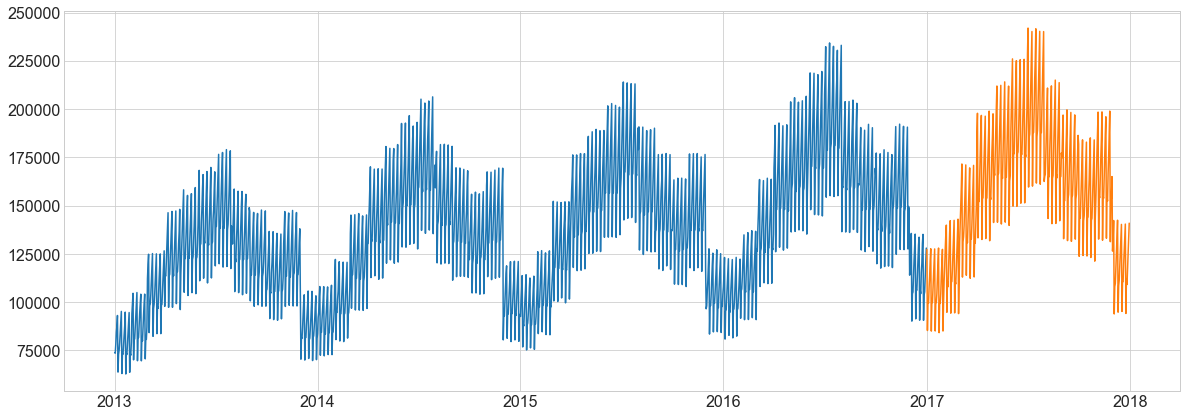

In [6]:
plt.plot(train_by_date.sale_date, train_by_date.sales_total)
plt.plot(test_by_date.sale_date, test_by_date.sales_total)
plt.show()

Only use your train data set to perform the following tasks:

In [7]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


In [8]:
train.sales_total.mean()

272.0925763175739

In [9]:
y = train.sales_total

### 3. Resample your data and visualize it.

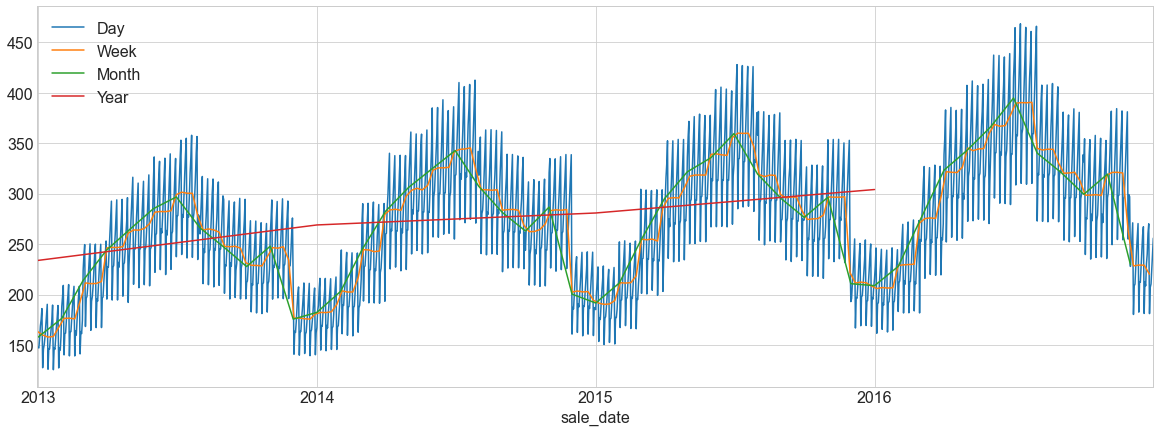

In [10]:
y.resample('D').mean().plot(label='Day')
y.resample('W').mean().plot(label='Week')
y.resample('M').mean().plot(label='Month')
y.resample('Y').mean().plot(label='Year')
plt.legend()

### 4. Creating a rolling (moving) average of your data and visualize it.

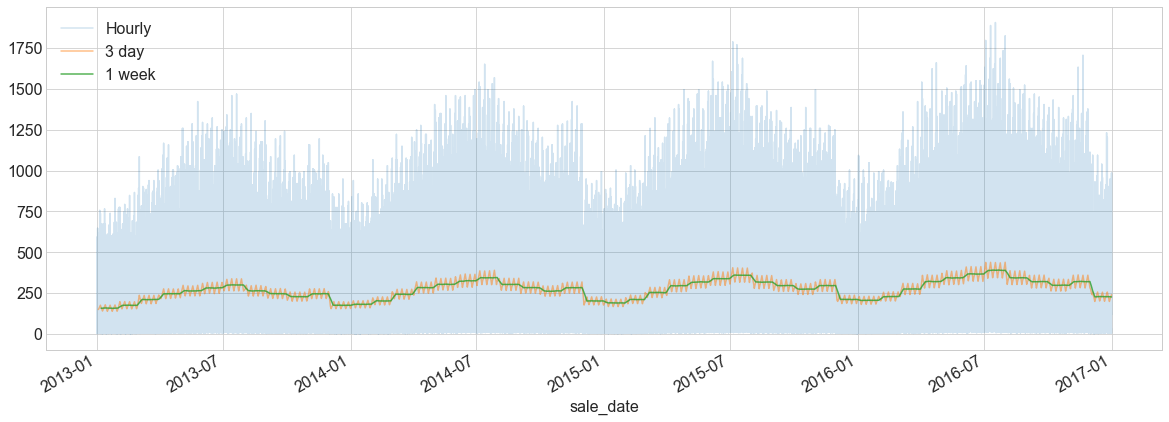

In [11]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

### 5. Plot the difference in sales from one day to the next.

In [12]:
y.resample('D').mean().diff()

sale_date
2013-01-01         NaN
2013-01-02    -0.54686
2013-01-03     9.19780
2013-01-04    12.59650
2013-01-05     6.30824
                ...   
2016-12-27    26.11398
2016-12-28     3.31210
2016-12-29    15.81582
2016-12-30    13.62358
2016-12-31    15.95134
Freq: D, Name: sales_total, Length: 1461, dtype: float64

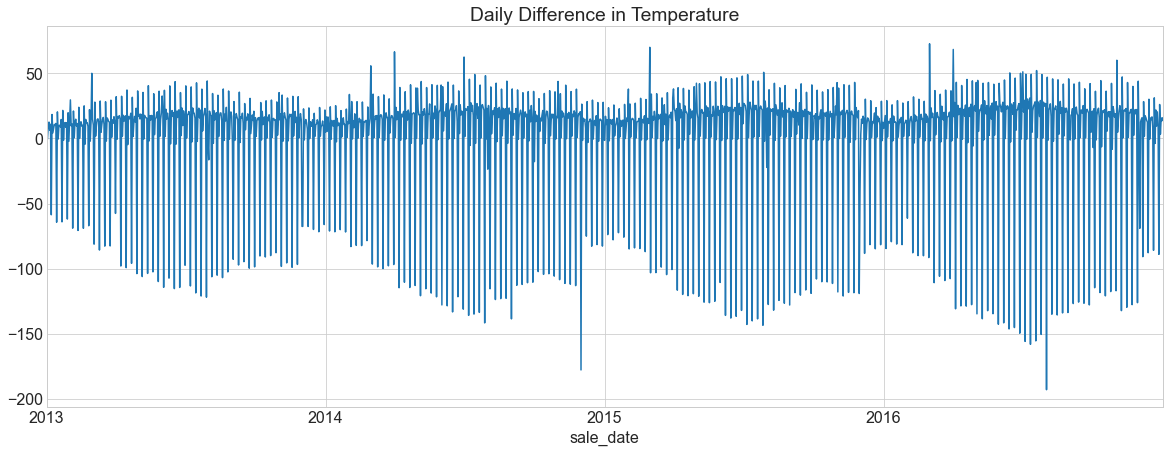

In [13]:
y.resample('D').mean().diff().plot(title='Daily Difference in Temperature');

### 6. Plot the % difference in sales from one day to the next.

make percent y ticks

<AxesSubplot:title={'center':'Average Day-to-Day % Change in Sales Total'}, xlabel='sale_date'>

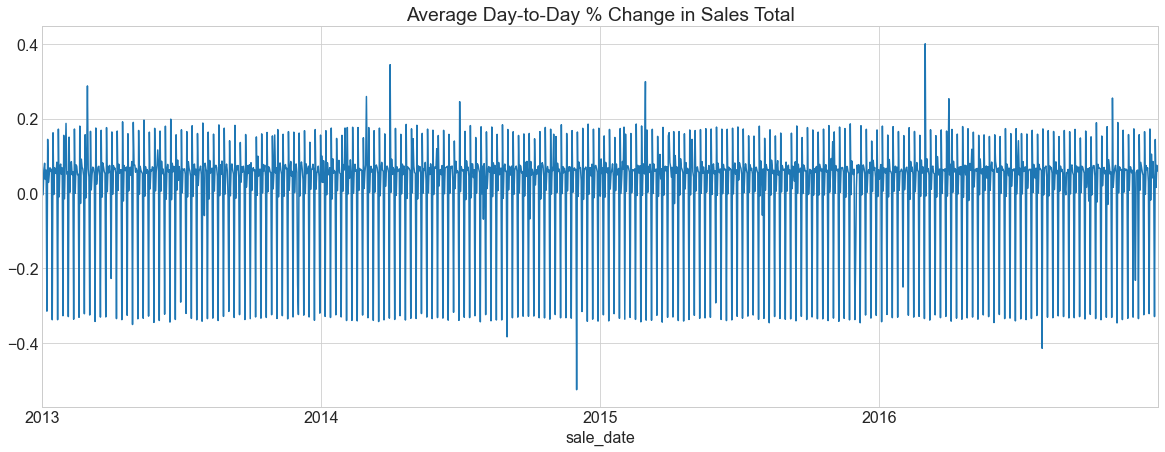

In [108]:
(y.resample('D').mean().diff() / y.resample('D').mean().shift()).plot(title='Average Day-to-Day % Change in Sales Total')



### 7. Plot the % difference in sales from one week to the next.

<AxesSubplot:title={'center':'Average Week-to-Week % Change in Sales Totals'}, xlabel='sale_date'>

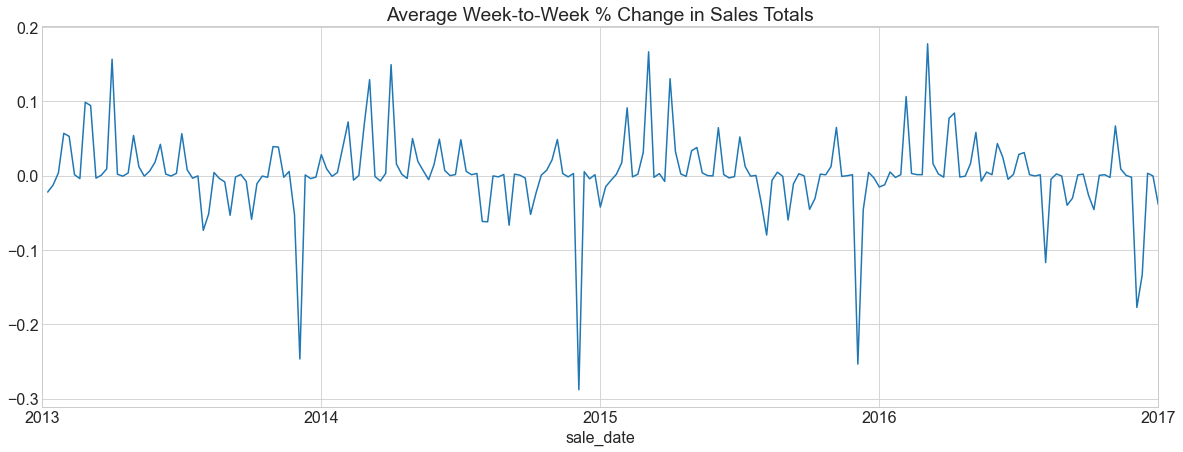

In [109]:
(y.resample('W').mean().diff() / y.resample('W').mean().shift()).plot(title='Average Week-to-Week % Change in Sales Totals')

### 8. Plot the % difference in sales from one month to the next.

<AxesSubplot:title={'center':'Average Month-to-Month % Change in Temperature'}, xlabel='sale_date'>

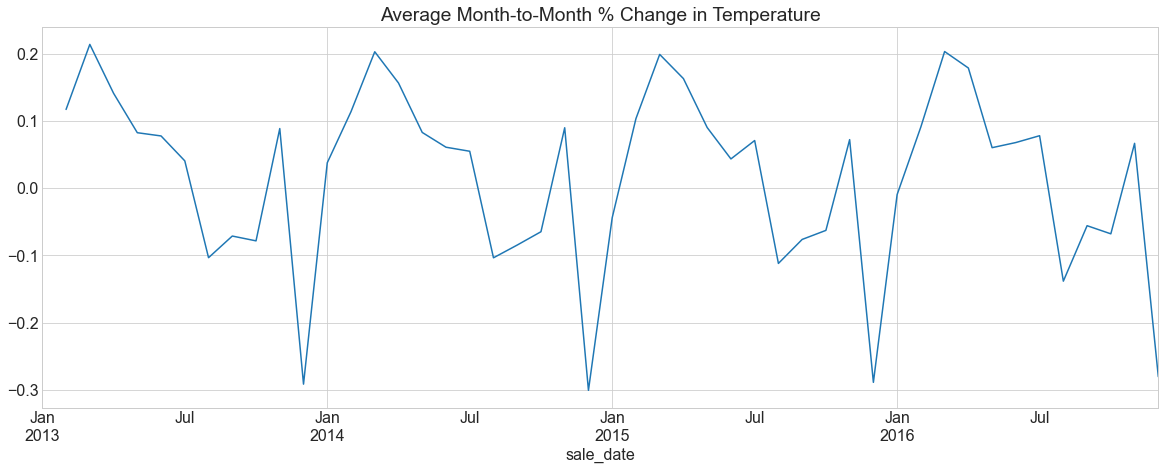

In [16]:
(y.resample('M').mean().diff() / y.resample('M').mean().shift()).plot(title='Average Month-to-Month % Change in Temperature')




### 9. Visualize an autocorrelation plot on a weekly resampling.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

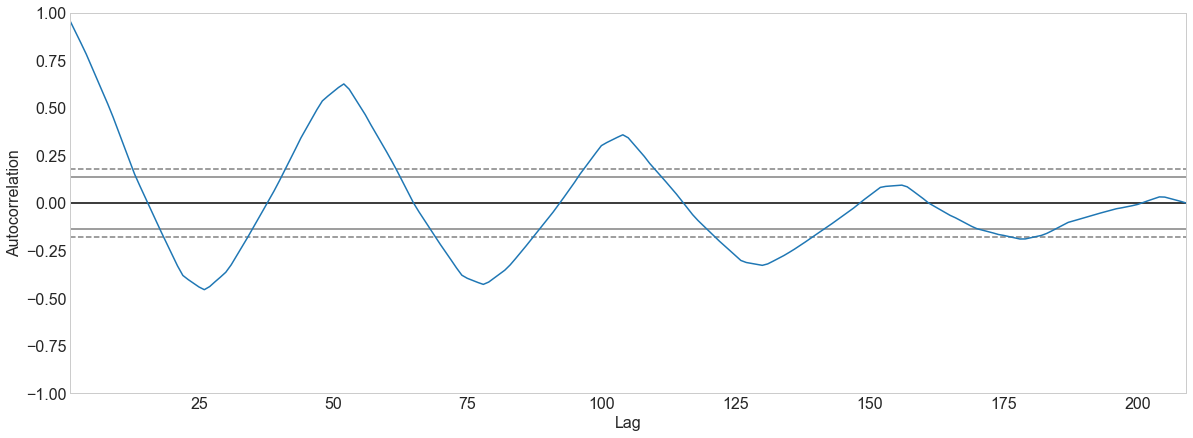

In [17]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

### 10. Visualize a seasonal decomposition plot on a weekly resampling.

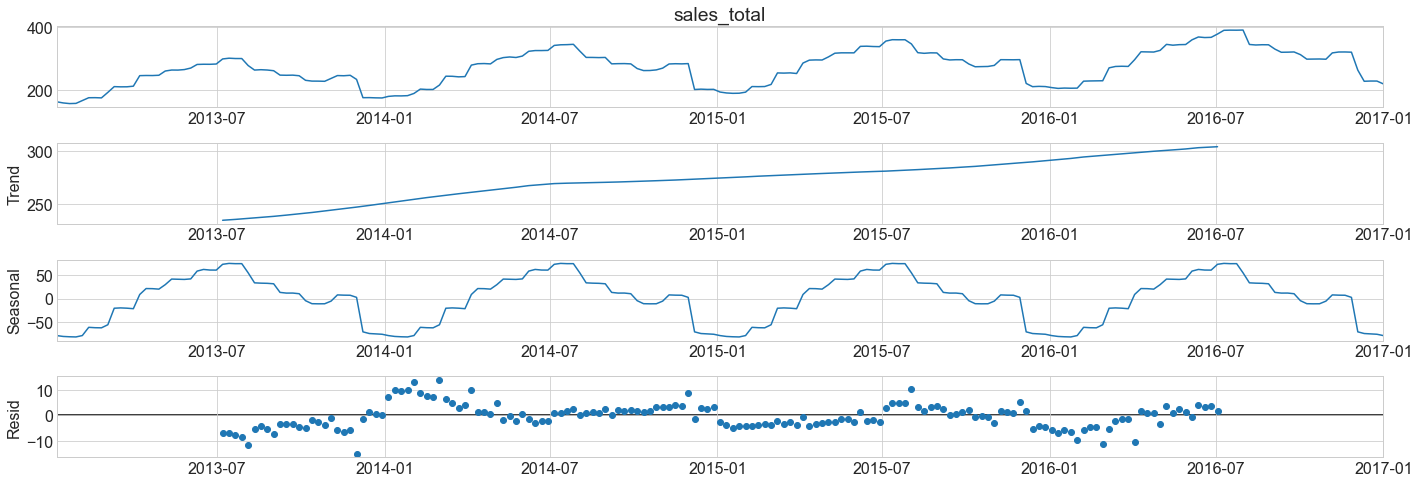

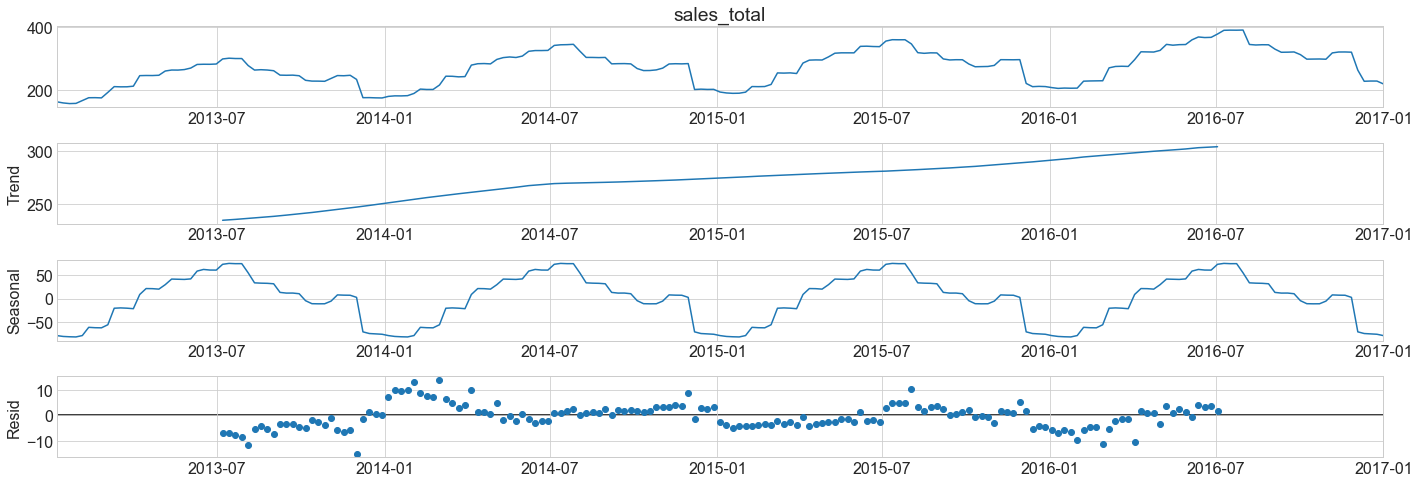

In [107]:
result = sm.tsa.seasonal_decompose(train.sales_total.resample('W').mean())
result.plot()

### OPS data
Load your OPS data using your acquire and/or prepare functions.

In [111]:
ops = p.acquire_and_prep_ops()

### 1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. 

In [112]:
train = ops[:'2013'] # includes 2013
test = ops['2014':]

train_by_date = train.groupby(['Date']).Consumption.sum().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_by_date = test.groupby(['Date']).Consumption.sum().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

### 2. Visualize your train-test split.

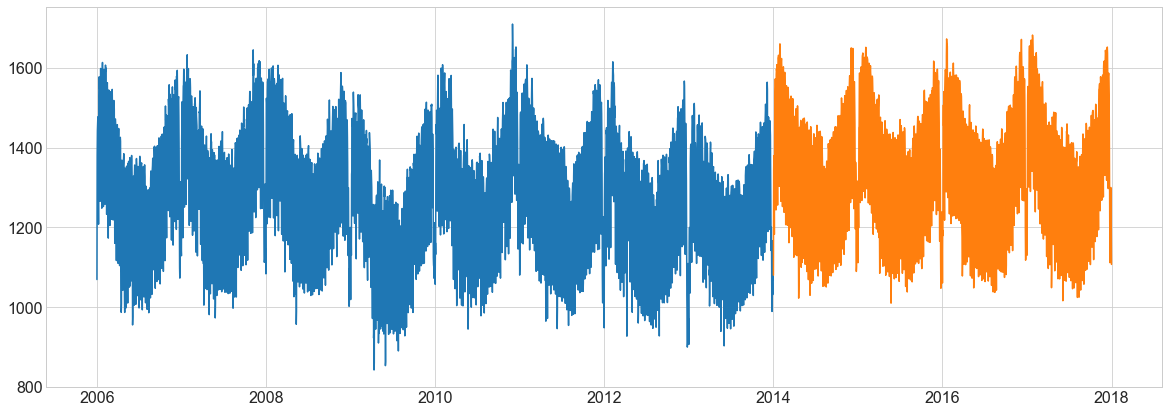

In [113]:
plt.plot(train_by_date.Date, train_by_date.Consumption)
plt.plot(test_by_date.Date, test_by_date.Consumption)
plt.show()

### 3. Plot the consumption, wind, and solar data on the same chart.
Only use the train data set to perform the following tasks:

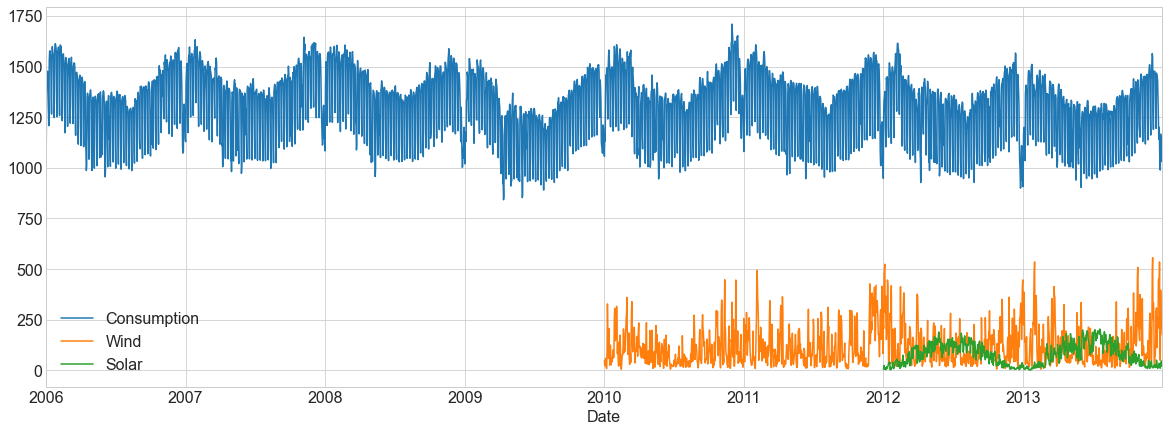

In [114]:
train['2010'].Consumption.plot()
train.Wind.plot()
train.Solar.plot()
plt.legend()

### 4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

In [56]:
train_consumption = train['2010'].Consumption

<AxesSubplot:xlabel='Date'>

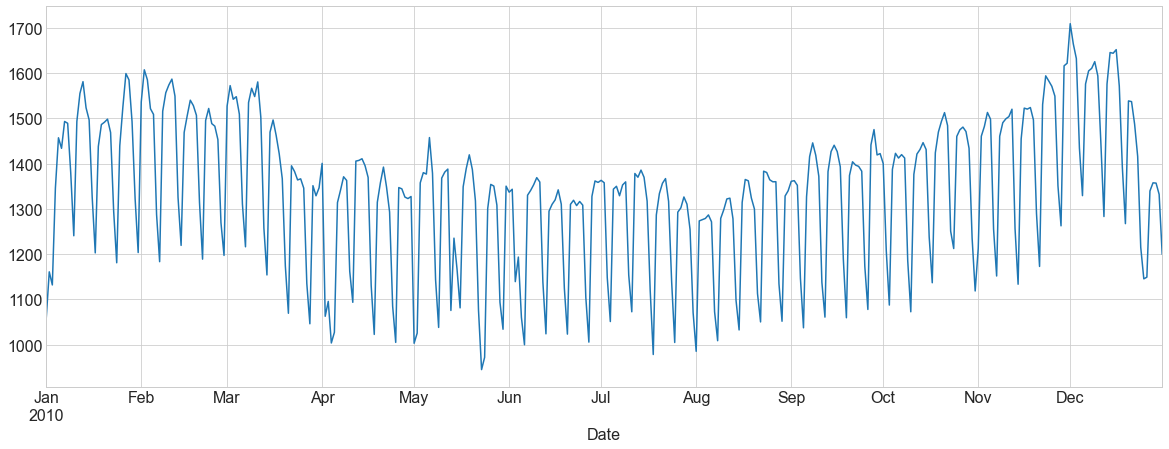

In [57]:
train_consumption.plot()

**Takeaways**
- Consumption is higher in the winter and lower in the summer.
- It is very wavy. Wavelength maybe about a week. Lowest on weekends? Let's look more.

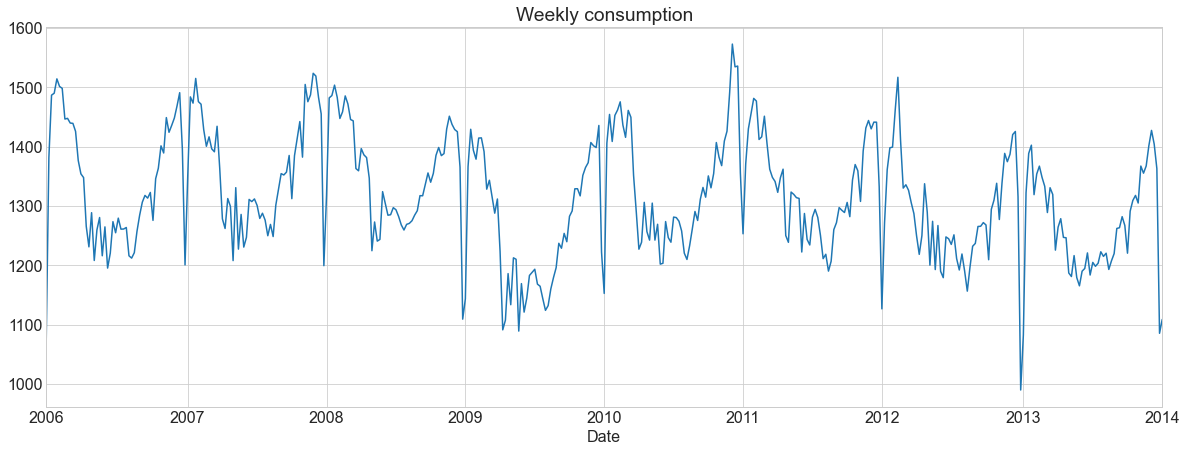

In [63]:
train.Consumption.resample('W').mean().plot(title='Weekly consumption');

**Takeaway**
- Seems like there is way less consumption at the very end of the year. Maybe because of the Christmas/New Year holiday?
- 

### 5. Resample the consumption data to monthly and plot it.

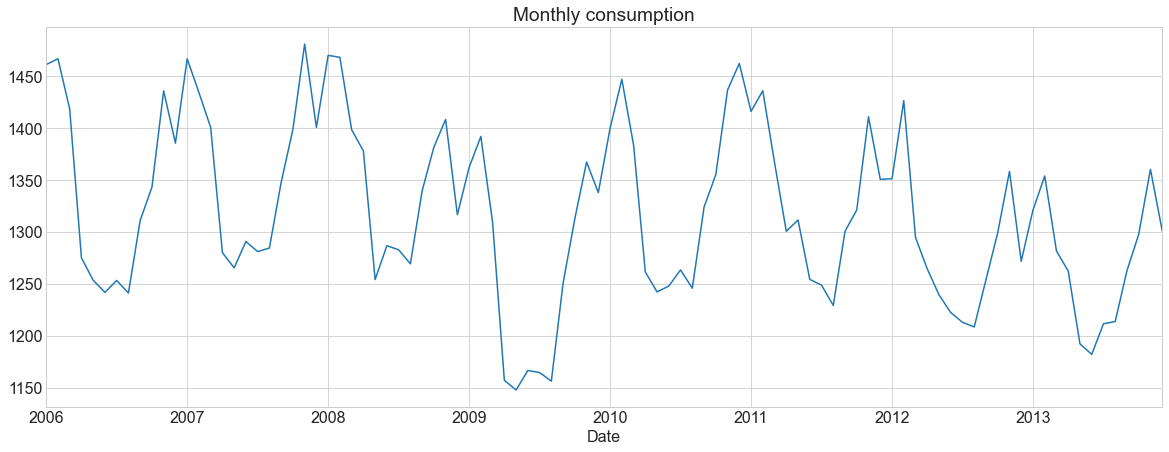

In [59]:
train.Consumption.resample('M').mean().plot(title='Monthly consumption');

### 6. Resample the consumption data to yearly and plot it.

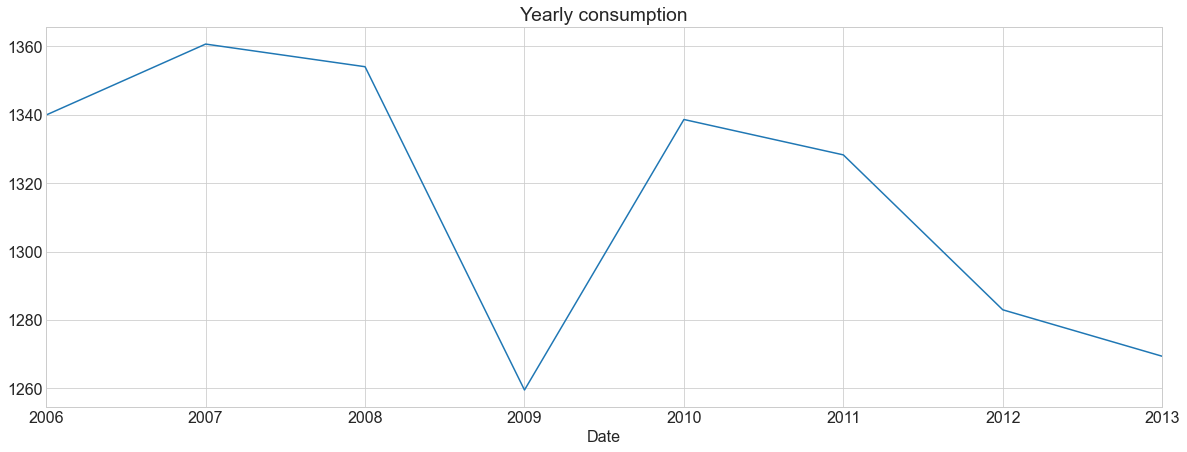

In [60]:
train.Consumption.resample('Y').mean().plot(title='Yearly consumption');

## BONUS:
### 7. Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.

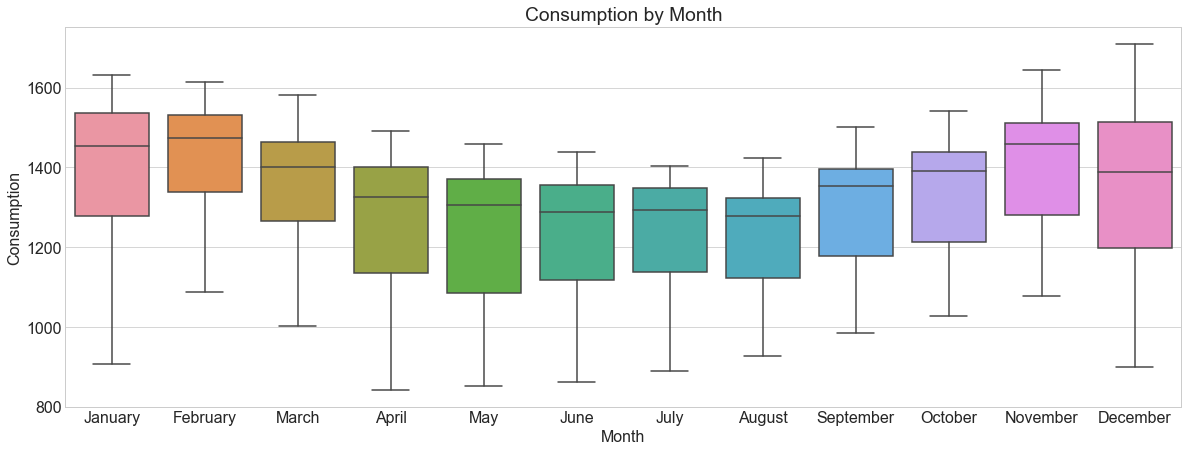

In [86]:
sns.boxplot(data=train, x = 'Month', y='Consumption')
plt.title("Consumption by Month")
plt.show()

### 8. Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.

In [87]:
train['Day of Week'] = train.index.day_name()

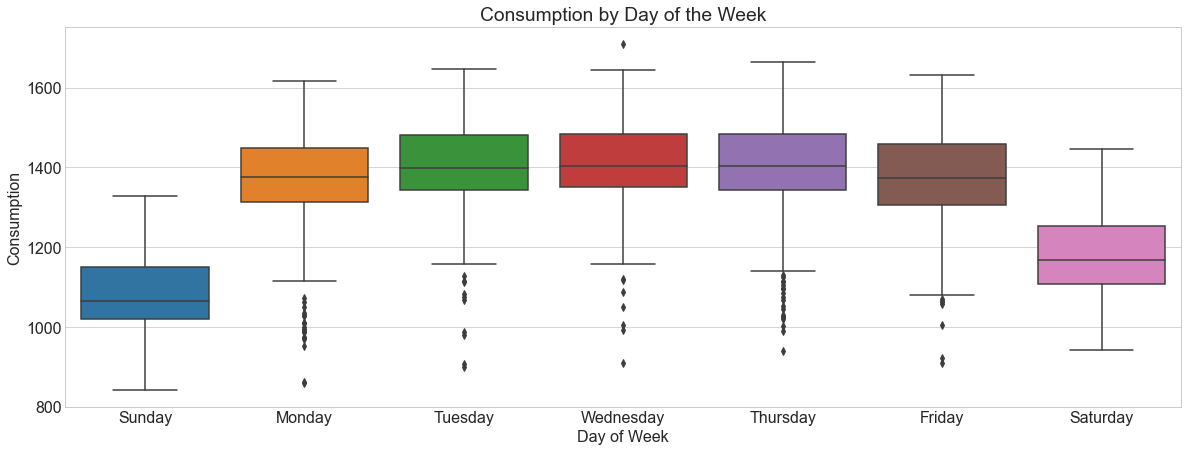

In [88]:
sns.boxplot(data=train, x = 'Day of Week', y='Consumption')
plt.title("Consumption by Day of the Week")
plt.show()

### 9. Create a subseasonal plot by month of your consumption data. 

In [90]:
# This is actually the same pivot table as above, but months are on the top and years are on the left
table = train.Consumption.groupby([train.index.year, train.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645


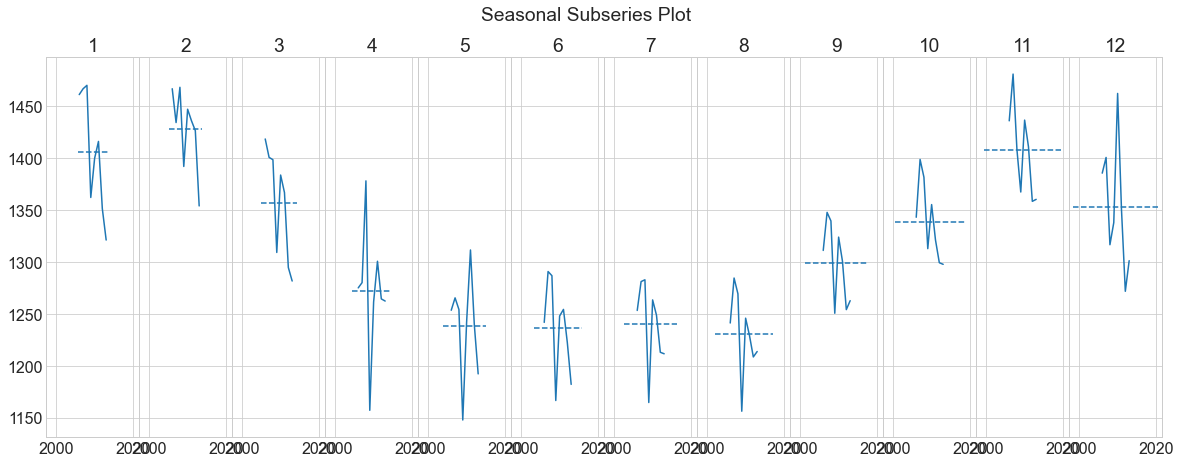

In [91]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### 10. Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? 

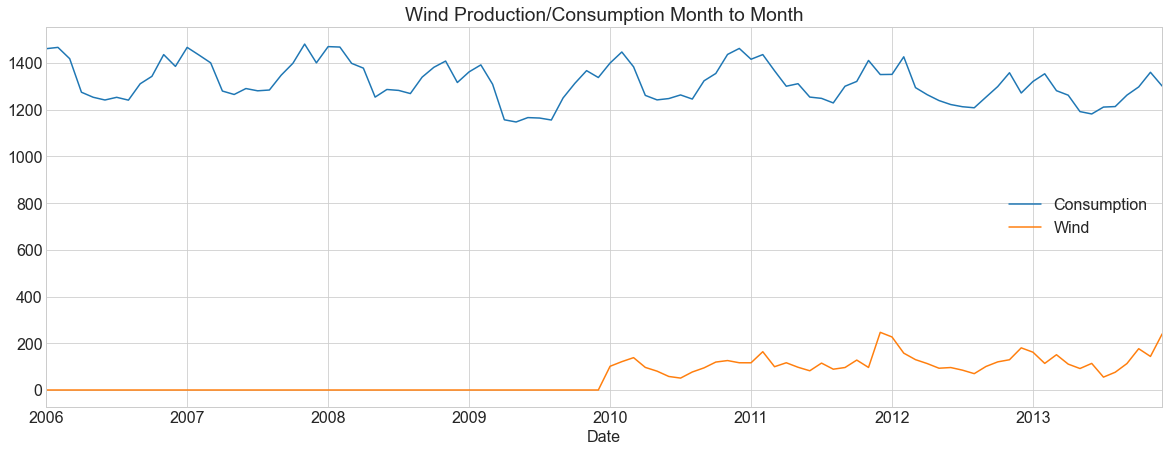

In [98]:
train.Consumption.resample('M').mean().plot()
train.Wind.resample('M').mean().plot()
plt.legend()
plt.title('Wind Production/Consumption Month to Month')
plt.show()

### How does wind production/consumption vary from year to year?

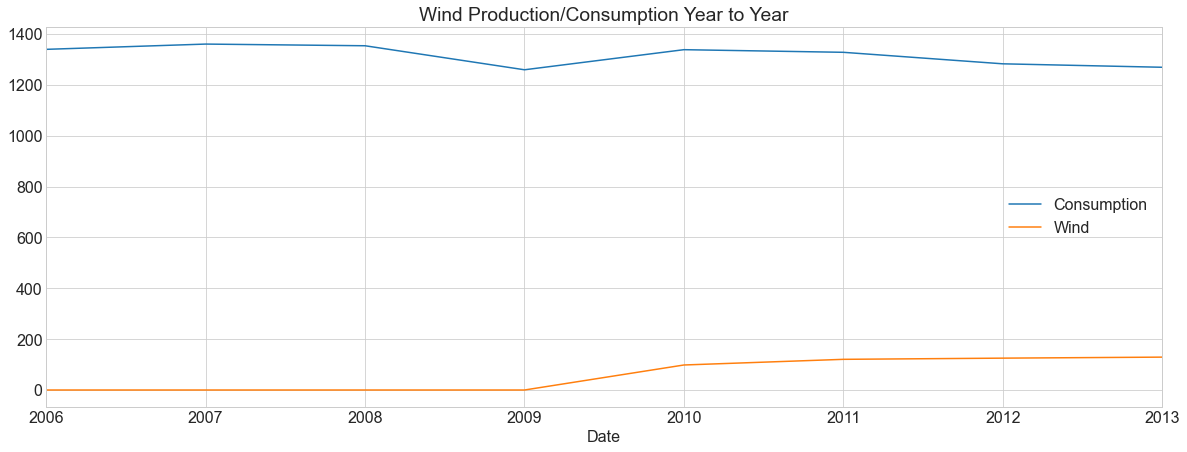

In [99]:
train.Consumption.resample('Y').mean().plot()
train.Wind.resample('Y').mean().plot()
plt.legend()
plt.title('Wind Production/Consumption Year to Year')
plt.show()

### 11. Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? 

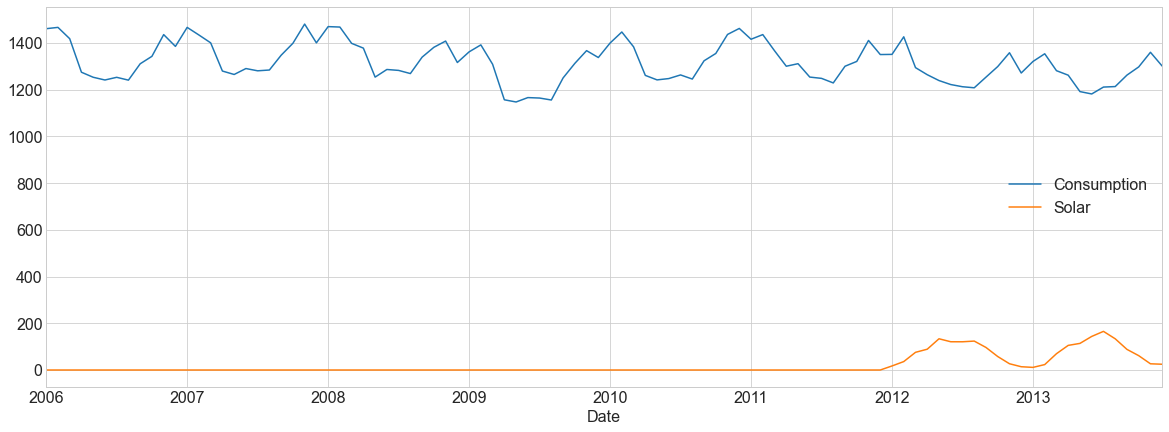

In [96]:
train.Consumption.resample('M').mean().plot()
train.Solar.resample('M').mean().plot()
plt.legend()
plt.title('Solar Production/Consumption Month to Month')
plt.show()

### How does solar production/consumption vary from year to year?

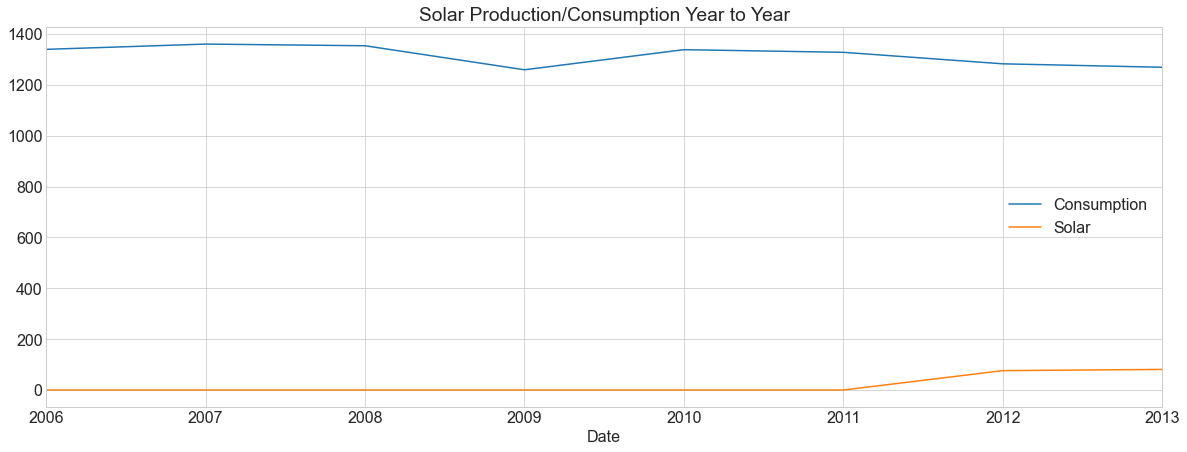

In [100]:
train.Consumption.resample('Y').mean().plot()
train.Solar.resample('Y').mean().plot()
plt.legend()
plt.title('Solar Production/Consumption Year to Year')
plt.show()

### 12. Plot a time series decomposition for your consumption data and note your takeaways.

### 13. Create an autocorrelation plot of a weekly resampling of the consumption data.